In [174]:
import msprime
import sys
import numpy as np
import seaborn as sns
from IPython.display import SVG
import matplotlib.pyplot as plt
from itertools import chain

In [204]:
%%time
pop_configs = [
    msprime.PopulationConfiguration(sample_size=100, growth_rate = 0),
    msprime.PopulationConfiguration(sample_size=100, growth_rate = 0),
    msprime.PopulationConfiguration(sample_size=100, growth_rate = 0)]

divergence_event1 = msprime.MassMigration(time = 50, source = 1, dest = 0, proportion = 1)
divergence_event2 = msprime.MassMigration(time = 1000, source = 2, dest = 0, proportion = 1)
Ne = 100
recomb = 0.5
mutation_rate = 0.25
ts_ref = msprime.simulate(population_configurations = pop_configs,Ne = Ne,mutation_rate=mutation_rate,
                      demographic_events = [divergence_event1,divergence_event2],
                      random_seed = 1, recombination_rate = recomb)
ref_stat = ts_ref.f3([pops[2],pops[0],pops[1]])
print(ref_stat)
print(ts_ref.num_mutations)

489.9956505050505
1741
Wall time: 29 ms


In [205]:
#ABC Function
def ABC(data,eps,pop_configs,pops,Ne,recomb,mutations,divergence2,prior ="exponential",prior_parameters=10,iters=1000):
    ref_stat = data.f3([pops[2],pops[0],pops[1]])
    samples = []
    if prior == "exponential":
        for iter in range(0,iterations):
            divergence_time = min(np.random.exponential(prior_parameters),200)
            divergence_event1 = msprime.MassMigration(time = divergence_time, source = 1, dest = 0, proportion = 1)
            ts_sim = msprime.simulate(population_configurations = pop_configs,Ne=Ne, mutation_rate=mutation_rate,
                      demographic_events = [divergence_event1,divergence_event2],recombination_rate = recomb)
            sim_stat = ts_sim.f3([pops[2],pops[0],pops[1]])
            if abs(ref_stat-sim_stat) < eps:
                samples.append(divergence_time)
    if prior == "uniform":
        for iter in range(0,iterations):
            divergence_time = min(np.random.uniform(prior_parameters[0],prior_parameters[1]),200)
            divergence_event1 = msprime.MassMigration(time = divergence_time, source = 1, dest = 0, proportion = 1)
            ts_sim = msprime.simulate(population_configurations = pop_configs,Ne=Ne, mutation_rate=mutation_rate,
                      demographic_events = [divergence_event1,divergence_event2],recombination_rate = recomb)
            sim_stat = ts_sim.f3([pops[2],pops[0],pops[1]])
            if abs(ref_stat-sim_stat) < eps:
                samples.append(divergence_time)
    return(samples)

In [210]:
%%time
#Exponential prior rate 40 
iterations = 100000
eps = 0.1
prior= "exponential"
prior_parameters = 40
pops = [range(0,100),range(100,200),range(200,300)]
attempt1 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,pops=pops,Ne=Ne,recomb=recomb,mutations=mutation_rate,divergence2 = divergence_event2,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 44min


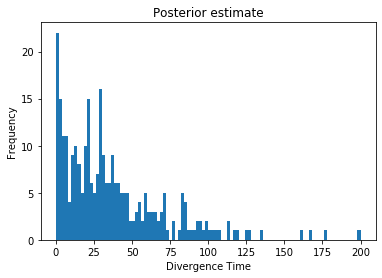

Acceptance probability : 0.00286


In [211]:
plt.hist(attempt1, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Divergence Time')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt1)/iterations)

In [212]:
%%time
#Uniform(0,180) prior
iterations = 100000
eps = 0.1
prior= "uniform"
prior_parameters = (1,180)
pops = [range(0,100),range(100,200),range(200,300)]
attempt2 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,pops=pops,Ne=Ne,recomb=recomb,mutations=mutation_rate,divergence2 = divergence_event2,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 45min 15s


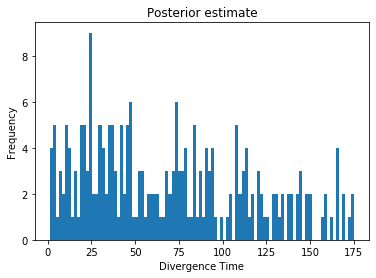

Acceptance probability : 0.00226


In [213]:
plt.hist(attempt2, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Divergence Time')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt2)/iterations)